<a href="https://colab.research.google.com/github/dzkmrn/2141720076-pcvk-2023/blob/main/Week9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 1**
## Muhammad Dzaka | 2141720076 | TI-3H

### D. Tugas Praktikum

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, lanjutkan dengan memilih repository yang telah
digunakan pada praktikum minggu lalu, rename file menjadi “Week9.ipynb”.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


2. Import beberapa library berikut yang akan digunakan selama uji coba praktikum
minggu ke-6 berikut.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

3. Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:

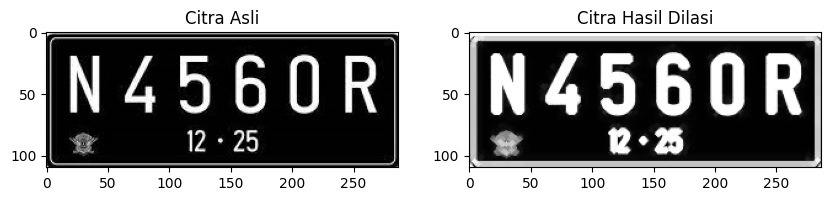

In [18]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

def dilasi(citra, sed):
    # Inisialisasi citra hasil dilasi
    hasil = np.zeros_like(citra)

    # Lakukan iterasi pada setiap piksel pada citra input
    for i in range(citra.shape[0]):
        for j in range(citra.shape[1]):
            # Inisialisasi nilai maksimum
            maks = 0

            # Lakukan iterasi pada setiap elemen pada SED
            for k in range(sed.shape[0]):
                for l in range(sed.shape[1]):
                    # Jika elemen SED adalah 1, maka tambahkan nilai piksel ke dalam citra hasil dilasi
                    if sed[k][l] == 1:
                        # Periksa apakah indeks piksel yang akan diakses berada di dalam batas citra
                        if i + k - 1 >= 0 and i + k - 1 < citra.shape[0] and j + l - 1 >= 0 and j + l - 1 < citra.shape[1]:
                            # Perbarui nilai maksimum
                            maks = max(maks, citra[i + k - 1][j + l - 1])

            # Setelah selesai melakukan iterasi pada semua elemen SED, masukkan nilai maksimum ke dalam citra hasil dilasi
            hasil[i][j] = maks

    return hasil

# Uji coba fungsi dilasi
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

sed = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

def dilate(image, sed, iterations=1):
    # Lakukan operasi dilasi sebanyak 'iterations' kali
    for _ in range(iterations):
        image = dilasi(image, sed)
    return image

# Melakukan operasi dilasi pada citra dengan beberapa iterasi
dilated_image = dilate(citra, sed, iterations=2)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

4. Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

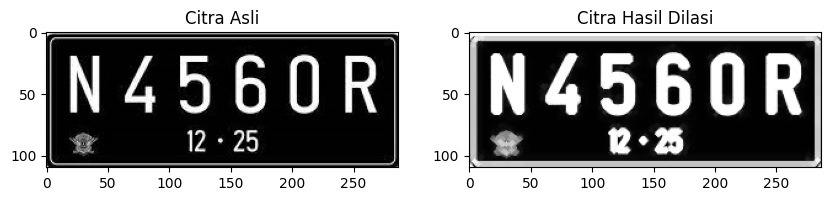

In [19]:
import cv2
import numpy as np

def dilate(image, iterations=1):
    # Buat Structuring Element Dilasi (SED) berbentuk cross 3 x 3
    sed = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

    # Lakukan operasi dilasi sebanyak 'iterations' kali
    dilated_image = cv2.dilate(image, sed, iterations=iterations)

    return dilated_image

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan operasi dilasi pada citra dengan beberapa iterasi
dilated_image = dilate(citra, iterations=2)

# Tampilkan citra asli dan hasil dilasi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(dilated_image, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


5. Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


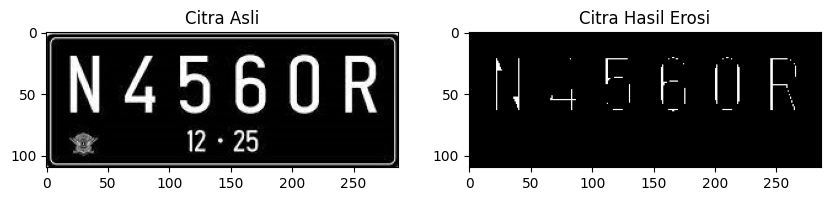

In [22]:
import numpy as np

def erosi(citra):
    # Konversi citra ke dalam bentuk biner
    citra_biner = cv2.threshold(citra, 127, 255, cv2.THRESH_BINARY)[1]

    # Buat Structuring Element Erosi (SE) berbentuk square 5 x 5
    se = np.ones((5, 5), dtype=np.uint8)

    # Lakukan erosi pada citra menggunakan SE square 5 x 5
    hasil_erosi = np.zeros_like(citra_biner)
    for i in range(2, citra_biner.shape[0] - 2):
        for j in range(2, citra_biner.shape[1] - 2):
            if np.all(citra_biner[i-2:i+3, j-2:j+3] == 255):
                hasil_erosi[i, j] = 255

    return hasil_erosi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan operasi erosi pada citra
hasil_erosi = erosi(citra)

# Tampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(hasil_erosi, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()

6. Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
menghasilkan tampilan seperti di bawah ini:


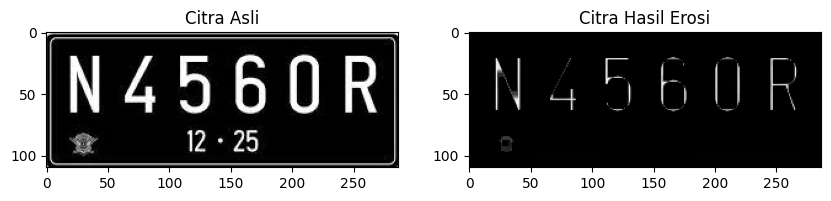

In [23]:
import cv2
import numpy as np

def erosi(citra):
    # Buat Structuring Element Erosi (SE) berbentuk square 5 x 5
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

    # Lakukan erosi pada citra menggunakan SE square 5 x 5
    hasil_erosi = cv2.erode(citra, se)

    return hasil_erosi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan operasi erosi pada citra
hasil_erosi = erosi(citra)

# Tampilkan citra asli dan hasil erosi
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(hasil_erosi, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()

7. Buatlah program implementasi operasi opening dengan Structuring Element
berbentuk square 3 x 3 tanpa dan dengan menggunakan library morphology dari
openCV, sehingga menghasilkan tampilan seperti di bawah ini:


**Operasi Opening Menggunakan tanpa Library Morphology**

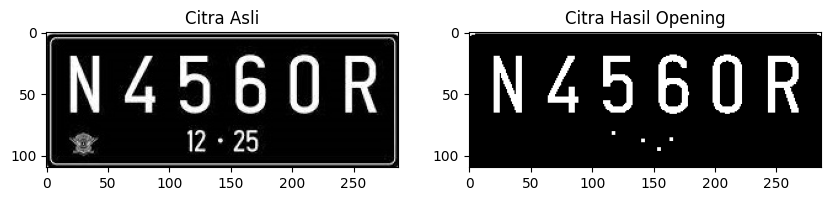

In [31]:
import cv2
import numpy as np

def opening(citra):
    # Buat Structuring Element berbentuk square 3 x 3
    se = np.ones((3, 3), dtype=np.uint8)

    # Konversi citra ke dalam bentuk biner
    citra_biner = cv2.threshold(citra, 127, 255, cv2.THRESH_BINARY)[1]

    # Lakukan operasi erosi pada citra biner menggunakan SE square 3 x 3
    hasil_erosi = cv2.erode(citra_biner, se)

    # Lakukan operasi dilasi pada citra hasil erosi menggunakan SE square 3 x 3
    hasil_dilasi = cv2.dilate(hasil_erosi, se)

    return hasil_dilasi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan operasi opening pada citra
hasil_opening = opening(citra)

# Tampilkan citra asli dan hasil opening
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(hasil_opening, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

**Operasi Opening Menggunakan Library Morphology**

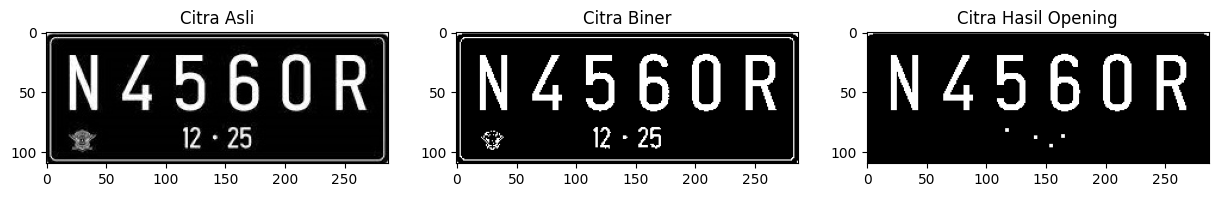

In [39]:
import cv2
import numpy as np

def opening(citra):
    # Buat Structuring Element berbentuk square 3 x 3
    se = np.ones((3, 3), dtype=np.uint8)

    # Konversi citra biner ke dalam bentuk grayscale
    citra_gray = cv2.cvtColor(citra, cv2.COLOR_GRAY2BGR)

    # Lakukan operasi opening pada citra menggunakan SE square 3 x 3
    hasil_opening = cv2.morphologyEx(citra_gray, cv2.MORPH_OPEN, se)

    return hasil_opening

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Konversi citra grayscale menjadi citra biner
citra_biner = cv2.threshold(citra, 127, 255, cv2.THRESH_BINARY)[1]

# Melakukan operasi opening pada citra biner
hasil_opening = opening(citra_biner)

# Tampilkan citra asli, citra biner, dan hasil opening
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(citra_biner, cmap='gray')
plt.title('Citra Biner')

plt.subplot(1, 3, 3)
plt.imshow(hasil_opening, cmap='gray')
plt.title('Citra Hasil Opening')

plt.show()

8. Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
sehingga menghasilkan tampilan seperti di bawah ini:

**Operasi Closing Tanpa Library Morphology**

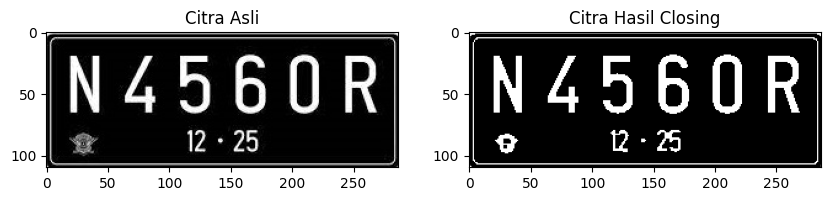

In [34]:
import cv2
import numpy as np

def closing(citra):
    # Buat Structuring Element berbentuk square 3 x 3
    se = np.ones((3, 3), dtype=np.uint8)

    # Konversi citra ke dalam bentuk biner
    citra_biner = cv2.threshold(citra, 127, 255, cv2.THRESH_BINARY)[1]

    # Lakukan operasi dilasi pada citra biner menggunakan SE square 3 x 3
    hasil_dilasi = cv2.dilate(citra_biner, se)

    # Lakukan operasi erosi pada citra hasil dilasi menggunakan SE square 3 x 3
    hasil_erosi = cv2.erode(hasil_dilasi, se)

    return hasil_erosi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Melakukan operasi closing pada citra
hasil_closing = closing(citra)

# Tampilkan citra asli dan hasil closing
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 2, 2)
plt.imshow(hasil_closing, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

**Operasi Closing Dengan Library Morphology**

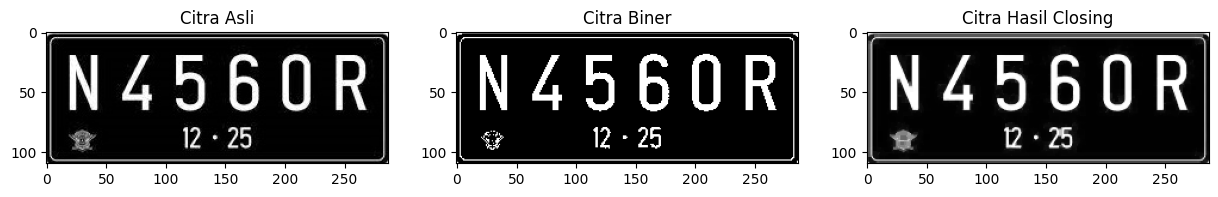

In [40]:
import cv2
import numpy as np

def closing(citra):
    # Buat Structuring Element berbentuk square 3 x 3
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))

    # Lakukan operasi closing pada citra menggunakan SE square 3 x 3
    hasil_closing = cv2.morphologyEx(citra, cv2.MORPH_CLOSE, se)

    return hasil_closing

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Konversi citra grayscale menjadi citra biner
citra_biner = cv2.threshold(citra, 127, 255, cv2.THRESH_BINARY)[1]

# Melakukan operasi closing pada citra
hasil_closing = closing(citra)

# Tampilkan citra asli dan hasil closing
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(1, 3, 2)
plt.imshow(citra_biner, cmap='gray')
plt.title('Citra Biner')

plt.subplot(1, 3, 3)
plt.imshow(hasil_closing, cmap='gray')
plt.title('Citra Hasil Closing')

plt.show()

9. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

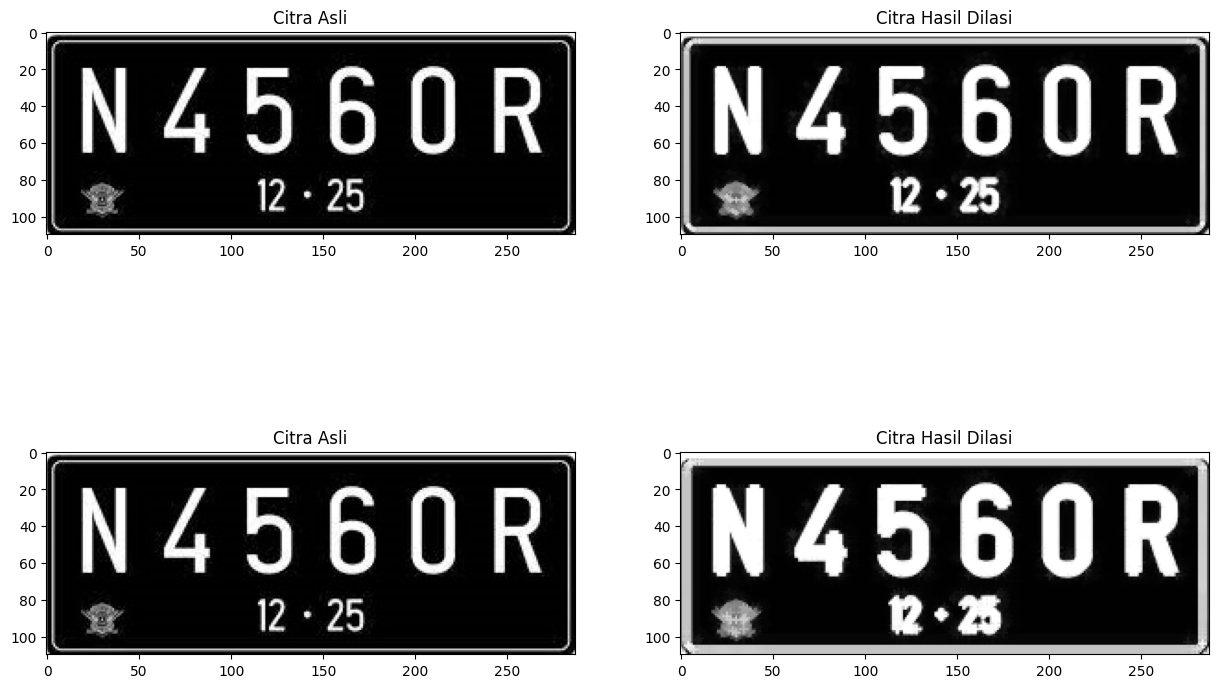

In [46]:
import cv2
import numpy as np

def dilasi(citra, se):
    # Lakukan operasi dilasi pada citra menggunakan SE yang diberikan
    hasil_dilasi = cv2.dilate(citra, se)

    return hasil_dilasi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk Cross 3 x 3 dan 5 x 5
se_3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))
se_5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

# Melakukan operasi dilasi pada citra dengan SE Cross 3 x 3 dan 5 x 5
hasil_dilasi_3 = dilasi(citra, se_3)
hasil_dilasi_5 = dilasi(citra, se_5)

# Tampilkan citra asli dan hasil dilasi dengan SE Cross 3 x 3 dan 5 x 5
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(hasil_dilasi_3, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.subplot(2, 2, 3)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 4)
plt.imshow(hasil_dilasi_5, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()

10. Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:

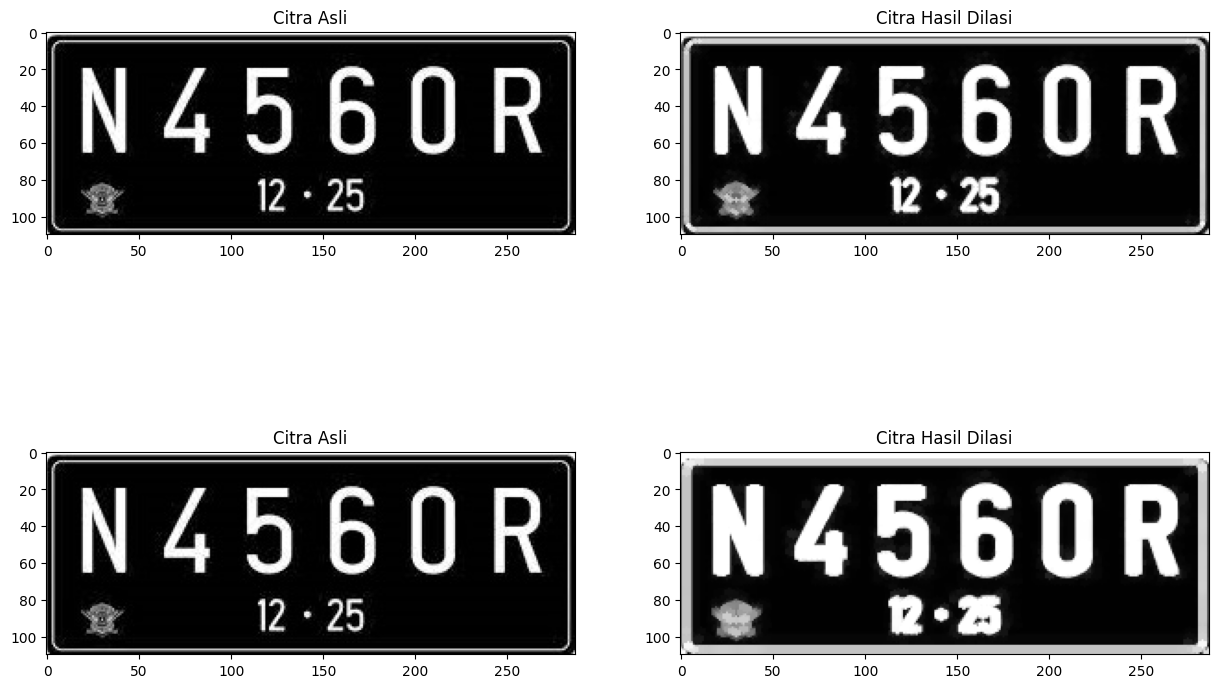

In [45]:
import cv2
import numpy as np

def dilasi(citra, se):
    # Lakukan operasi dilasi pada citra menggunakan SE yang diberikan
    hasil_dilasi = cv2.dilate(citra, se)

    return hasil_dilasi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk Circular 3 x 3 dan 5 x 5
se_3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
se_5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

# Melakukan operasi dilasi pada citra dengan SE Circular 3 x 3 dan 5 x 5
hasil_dilasi_3 = dilasi(citra, se_3)
hasil_dilasi_5 = dilasi(citra, se_5)

# Tampilkan citra asli dan hasil dilasi dengan SE Circular 3 x 3 dan 5 x 5
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(hasil_dilasi_3, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.subplot(2, 2, 3)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 4)
plt.imshow(hasil_dilasi_5, cmap='gray')
plt.title('Citra Hasil Dilasi')

plt.show()


11. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:


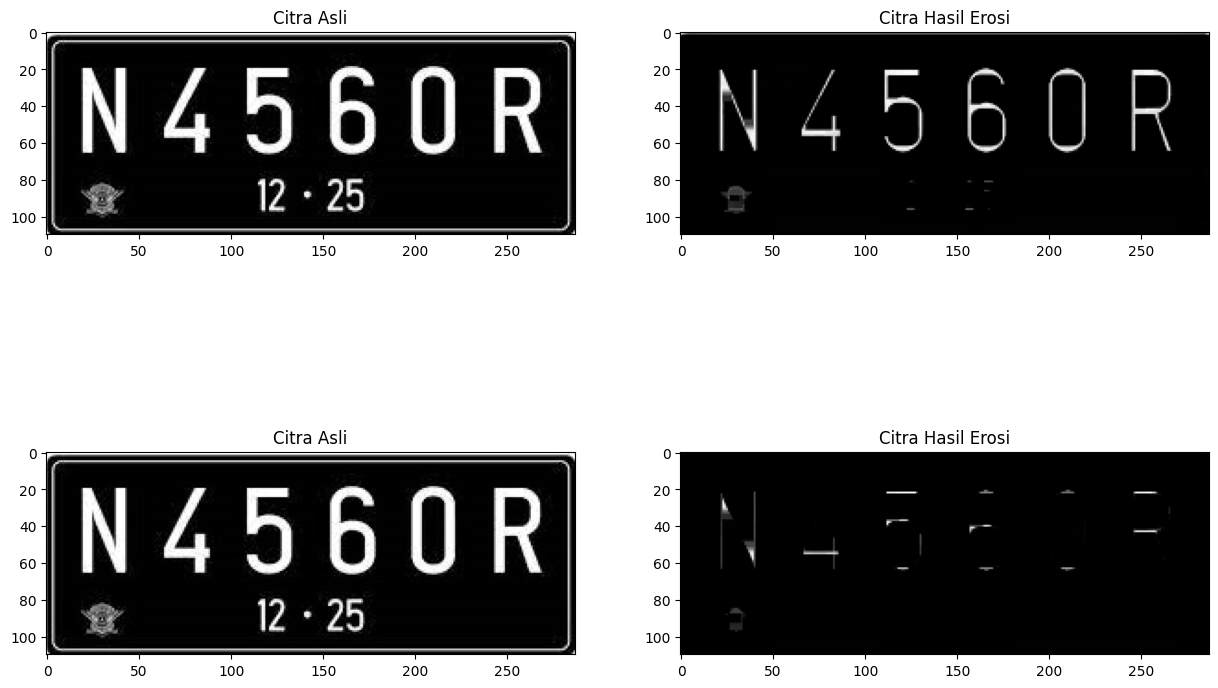

In [48]:
import cv2
import numpy as np

def erosi(citra, se):
    # Lakukan operasi erosi pada citra menggunakan SE yang diberikan
    hasil_erosi = cv2.erode(citra, se)

    return hasil_erosi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk Rectangle 3 x 5 dan 5 x 7
se_3x5 = np.ones((3, 5), dtype=np.uint8)
se_5x7 = np.ones((5, 7), dtype=np.uint8)

# Melakukan operasi erosi pada citra dengan SE Rectangle 3 x 5 dan 5 x 7
hasil_erosi_3x5 = erosi(citra, se_3x5)
hasil_erosi_5x7 = erosi(citra, se_5x7)

# Tampilkan citra asli dan hasil dilasi dengan Rectangle 3 x 5 dan 5 x 7
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 2)
plt.imshow(hasil_erosi_3x5, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.subplot(2, 2, 3)
plt.imshow(citra, cmap='gray')
plt.title('Citra Asli')

plt.subplot(2, 2, 4)
plt.imshow(hasil_erosi_5x7, cmap='gray')
plt.title('Citra Hasil Erosi')

plt.show()

12. Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
gambar j.png)


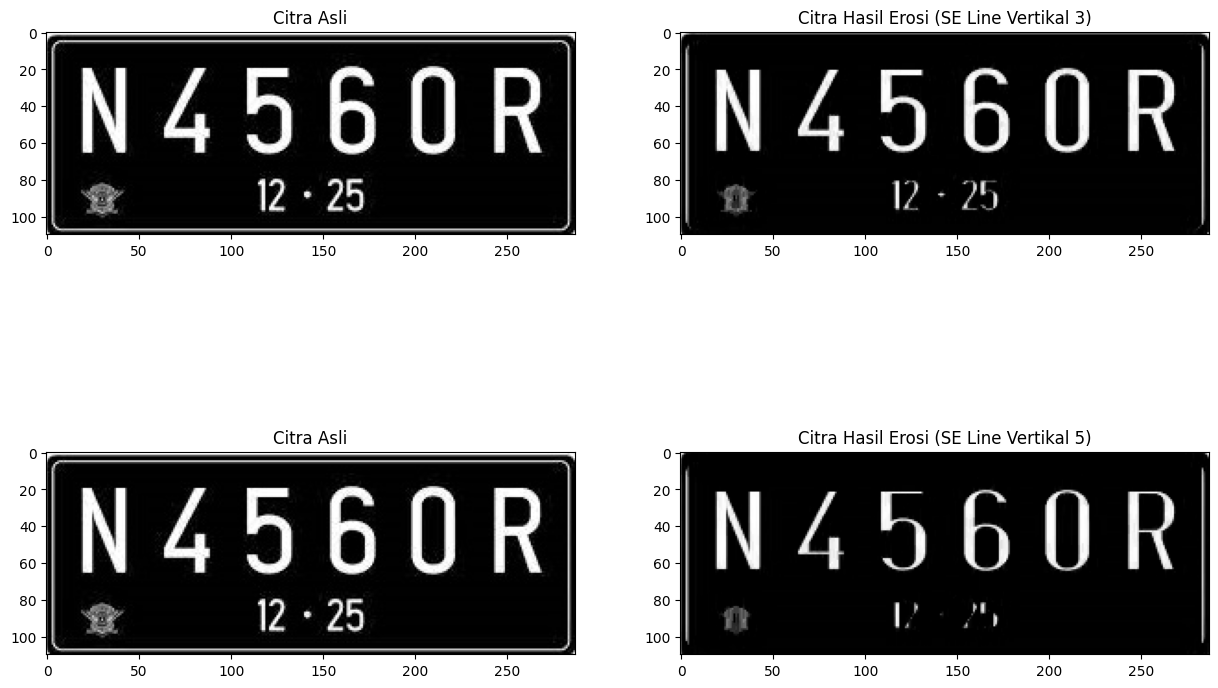

In [55]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def erosi(citra, se):
    # Lakukan operasi erosi pada citra menggunakan SE yang diberikan
    hasil_erosi = cv2.erode(citra, se)

    return hasil_erosi

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/plat nomer.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk Line Vertikal 3 dan 5
se_3 = np.array([[0, 1, 0], [0, 1, 0], [0, 1, 0]], dtype=np.uint8)
se_5 = np.array([[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0]], dtype=np.uint8)

# Melakukan operasi erosi pada citra dengan SE Line Vertikal 3 dan 5
hasil_erosi_3 = erosi(citra, se_3)
hasil_erosi_5 = erosi(citra, se_5)

# Tampilkan citra asli dan hasil dilasi dengan SE Line Vertikal 3 dan 5
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
plt.imshow(citra,cmap='gray')
plt.title('Citra Asli')

plt.subplot(2,2,2)
plt.imshow(hasil_erosi_3,cmap='gray')
plt.title('Citra Hasil Erosi (SE Line Vertikal 3)')

plt.subplot(2,2,3)
plt.imshow(citra,cmap='gray')
plt.title('Citra Asli')

plt.subplot(2,2,4)
plt.imshow(hasil_erosi_5,cmap='gray')
plt.title('Citra Hasil Erosi (SE Line Vertikal 5)')

plt.show()

13. Tophat

Text(0.5, 1.0, 'Citra Hasil Tophat (SE Line Vertikal 5)')

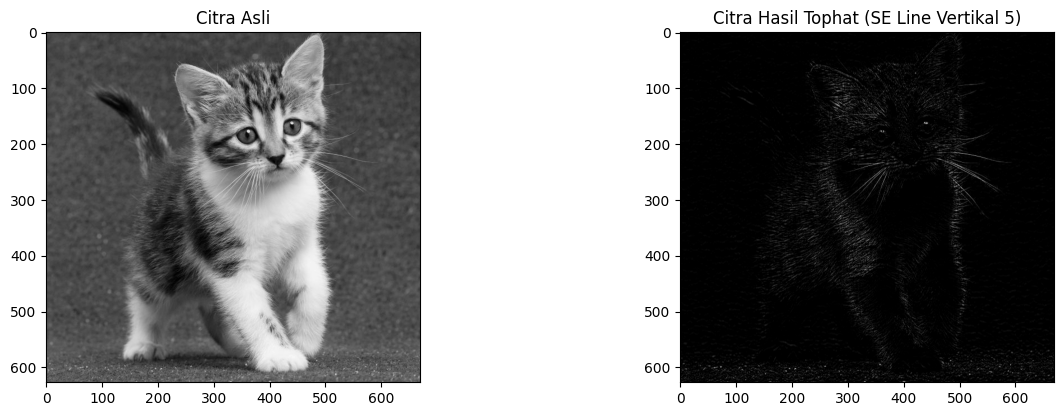

In [62]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def tophat(citra, se):
    # Lakukan operasi tophat pada citra menggunakan SE yang diberikan
    hasil_tophat = cv2.morphologyEx(citra, cv2.MORPH_TOPHAT, se)

    return hasil_tophat

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk Line Vertikal 5
se_5 = np.array([[0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0], [0, 0, 1, 0, 0]], dtype=np.uint8)

# Tampilkan citra asli dan hasil tophat line vertikal 5
plt.figure(figsize=(15,10))

hasil_tophat = tophat(citra, se_5)

plt.subplot(2,2,1)
plt.imshow(citra,cmap='gray')
plt.title('Citra Asli')

plt.subplot(2,2,2)
plt.imshow(hasil_tophat,cmap='gray')
plt.title('Citra Hasil Tophat (SE Line Vertikal 5)')


14. Blackhat

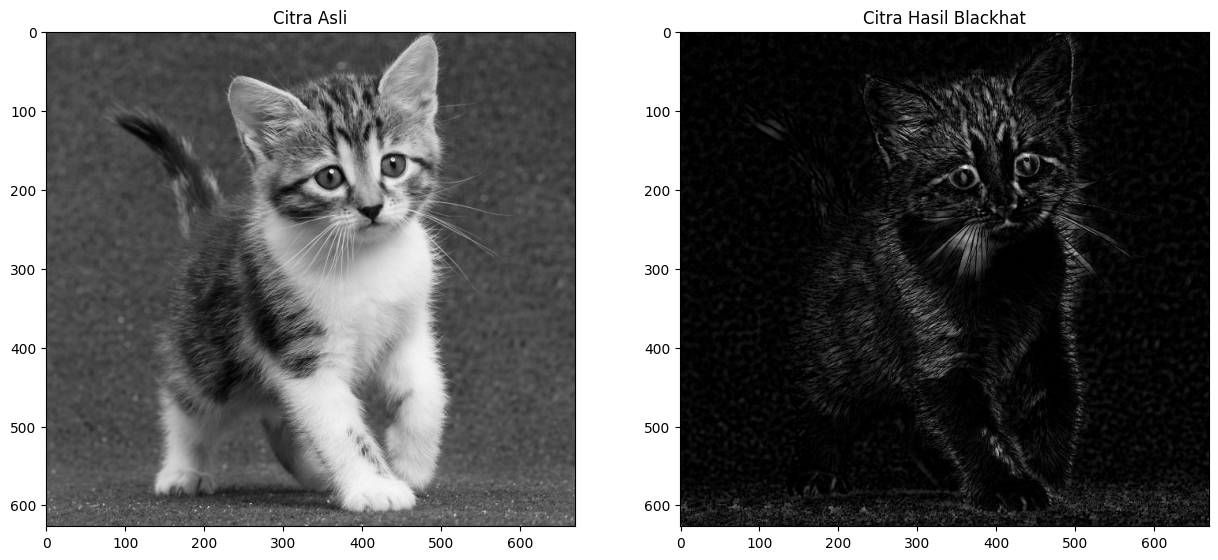

In [69]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def blackhat(citra, se):
    # Lakukan operasi blackhat pada citra menggunakan SE yang diberikan
    hasil_blackhat = cv2.morphologyEx(citra, cv2.MORPH_BLACKHAT, se)

    return hasil_blackhat

# Baca citra dari file
citra = cv2.imread('/content/drive/MyDrive/pcvk/kitten01.jpg', cv2.IMREAD_GRAYSCALE)

# Buat Structuring Element berbentuk circular 10x10
se = cv.getStructuringElement(cv.MORPH_ELLIPSE, (10, 10))

# Melakukan operasi blackhat pada citra dengan SE Line Vertikal 3 dan SE Line Vertikal 5
hasil_blackhat = blackhat(citra, se)

# Tampilkan citra asli dan hasil blackhat dengan SE Line Vertikal 3 dan SE Line Vertikal 5
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(citra,cmap='gray')
plt.title('Citra Asli')

plt.subplot(1,2,2)
plt.imshow(hasil_blackhat,cmap='gray')
plt.title('Citra Hasil Blackhat')

plt.show()

15. Skeleton

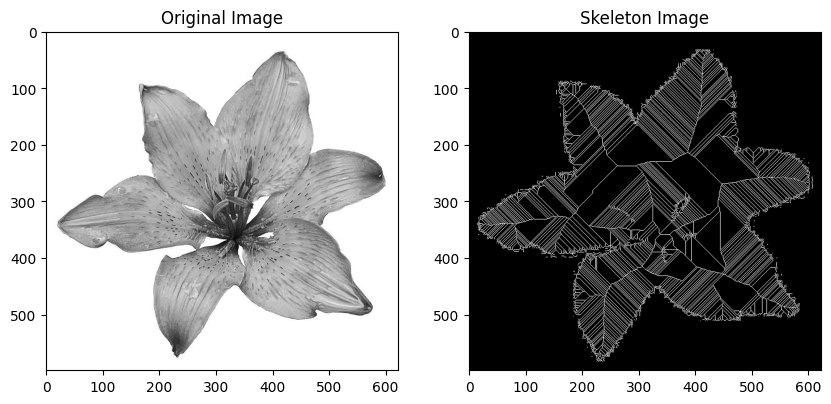

In [78]:
from skimage.morphology import skeletonize, thin
from skimage.util import invert

img = cv.imread('/content/drive/MyDrive/pcvk/lily.jpg', cv.IMREAD_GRAYSCALE)
image_inverted = invert(img)
image_skeleton = skeletonize(image_inverted, method='lee')

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_skeleton, cmap='gray')
plt.title('Skeleton Image')

plt.show()

16. Skeleton Inverse

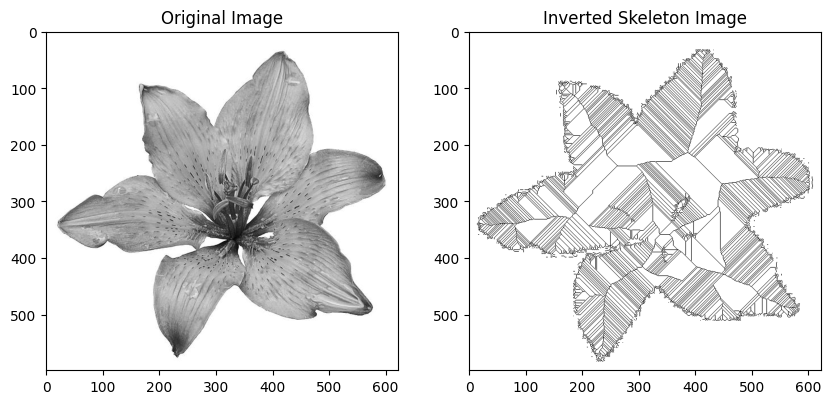

In [79]:
from skimage.morphology import skeletonize, thin
from skimage.util import invert

img = cv.imread('/content/drive/MyDrive/pcvk/lily.jpg', cv.IMREAD_GRAYSCALE)
image_inverted = invert(img)
image_skeleton = skeletonize(image_inverted, method='lee')

# Inversi hasil skeleton
image_skeleton_inverted = invert(image_skeleton)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_skeleton_inverted, cmap='gray')
plt.title('Inverted Skeleton Image')

plt.show()

17. Thickening

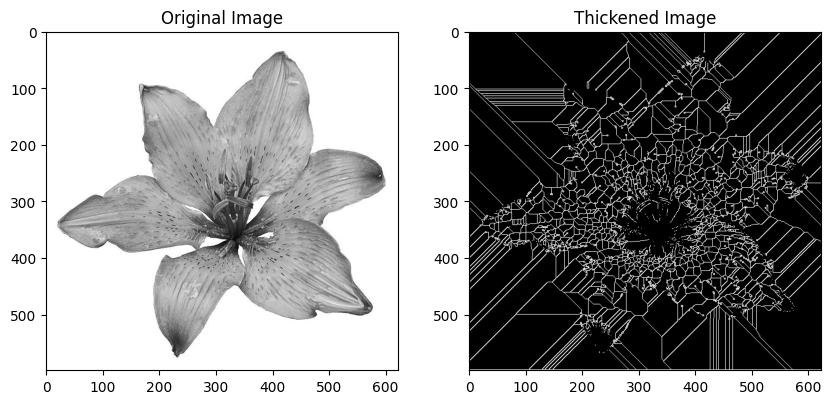

In [81]:
from skimage.morphology import skeletonize, thin
from skimage.util import invert

img = cv.imread('/content/drive/MyDrive/pcvk/lily.jpg', cv.IMREAD_GRAYSCALE)

# Melakukan operasi thickening
image_thickened = cv2.ximgproc.thinning(img)

plt.figure(figsize=(10, 10))

plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(image_thickened, cmap='gray')
plt.title('Thickened Image')

plt.show()

### E. Tugas Praktikum

Tugas Praktikum Morfologi melibatkan implementasi dataset KTP yang terdapat dalam
Modul 7. Dalam tugas ini, kita akan menggunakan semua informasi yang disediakan dalam
modul Morfologi dan menerapkan sejumlah nilai tambahan dalam kode sumber. Tujuannya
adalah agar citra KTP dapat terbaca dengan baik ketika teknik morfologi diterapkan pada citra
tersebut.
